In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.kaggle.com/camnugent/california-housing-prices<br>
Os dados pertencem às casas encontradas em um determinado distrito da Califórnia e algumas estatísticas resumidas sobre eles, com base nos dados do censo de 1990. O objetivo é criar um modelo preditivo e descobrir o preço médio das casas em um bloco.

# Importando e visualizando a tabela

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


|Feature|Descrição|
|--|--|
|longitude|Uma medida de quão longe uma casa é a oeste; um valor mais alto é mais a oeste|
|latitude|Uma medida de quão longe fica uma casa ao norte; um valor mais alto é mais ao norte|
|housing_median_age|Idade mediana de uma casa dentro de um bloco; um número menor é um edifício mais novo|
|total_rooms|Número total de quartos dentro de um bloco|
|total_bedrooms|Número total de quartos dentro de um bloco|
|population|Número total de pessoas que residem em um bloco|
|households|Número total de famílias, um grupo de pessoas que residem dentro de uma unidade residencial, por um bloco|
|median_income|Renda mediana para famílias dentro de um bloco de casas (medido em dezenas de milhares de dólares americanos)|
|median_house_value|Valor médio da casa para famílias dentro de um bloco (medido em dólares americanos)|
|ocean_proximity|Localização da casa com oceano / mar|

In [4]:
df.shape

(20640, 10)

In [5]:
target = 'median_house_value'

# Verificando dados faltantes e tipo de cada coluna

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Visualizando informações sobre os dados

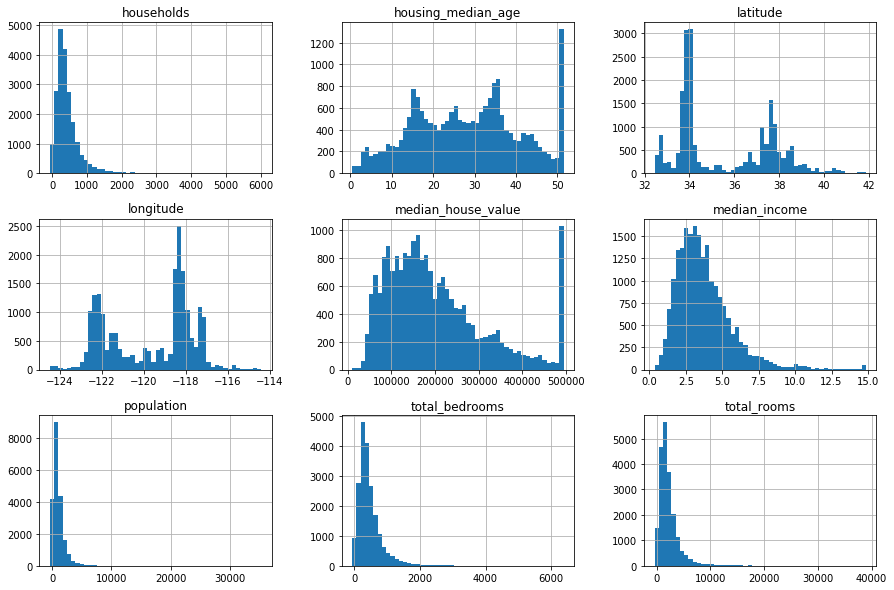

In [8]:
df.hist(bins=50, figsize=(15, 10), align='left');

In [9]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
df['ocean_proximity'] = df['ocean_proximity'].replace('ISLAND', '<1H OCEAN')
df['ocean_proximity'].value_counts()

<1H OCEAN     9141
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

In [11]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


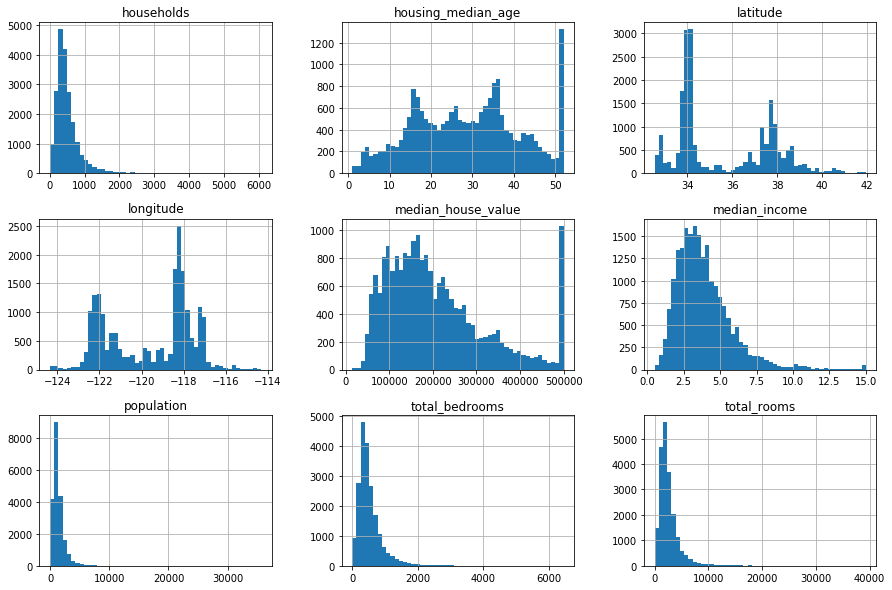

In [12]:
df.hist(bins=50, figsize=(15 , 10));
df.describe()

In [13]:
df['households'] = df['households'].clip(0, 2000)
df['population'] = df['population'].clip(0, 5000)
df['total_bedrooms'] = df['total_bedrooms'].clip(0, 2000)
df['total_rooms'] = df['total_rooms'].clip(0, 10000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2573.140504,527.506387,1393.864874,492.386337,3.870671,206855.816909
std,2.003532,2.135952,12.585558,1795.296050,361.558471,932.763850,337.735905,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,10000.000000,2000.000000,5000.000000,2000.000000,15.000100,500001.000000


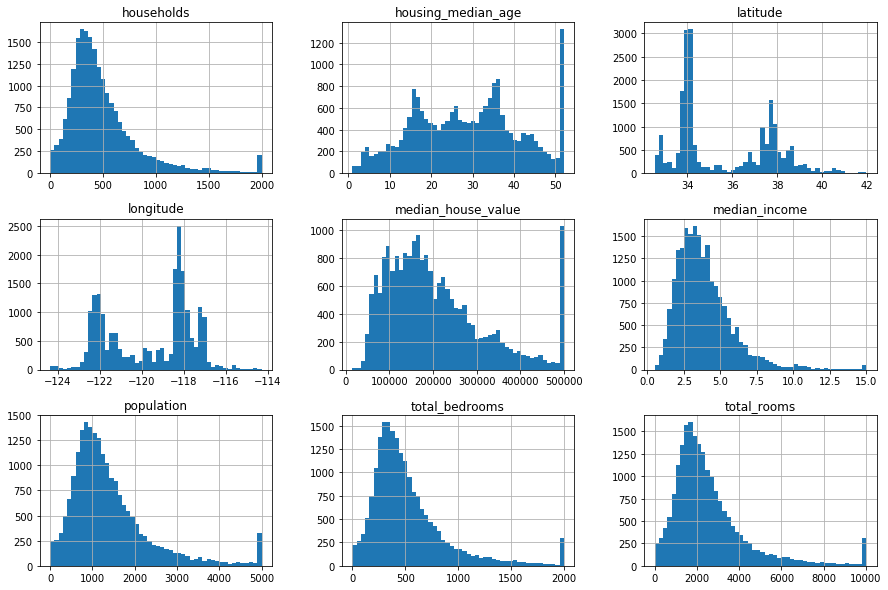

In [14]:
df.hist(bins=50, figsize=(15 , 10));
df.describe()

# Combinando features

In [15]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_household'] = df['total_bedrooms']/df['households']
df['population_per_household'] = df['population']/df['households']

In [16]:
new_features = ['rooms_per_household', 'bedrooms_per_household','population_per_household']

,rooms_per_household,bedrooms_per_household,population_per_household
count,20640.000000,20433.000000,20640.000000
mean,5.416425,1.095590,3.034397
std,2.465286,0.475167,7.770145
min,0.846154,0.333333,0.692308
25%,4.444141,1.004098,2.432609
50%,5.209536,1.047619,2.809812
75%,6.026677,1.098535,3.274398
max,141.909091,34.066667,833.333333


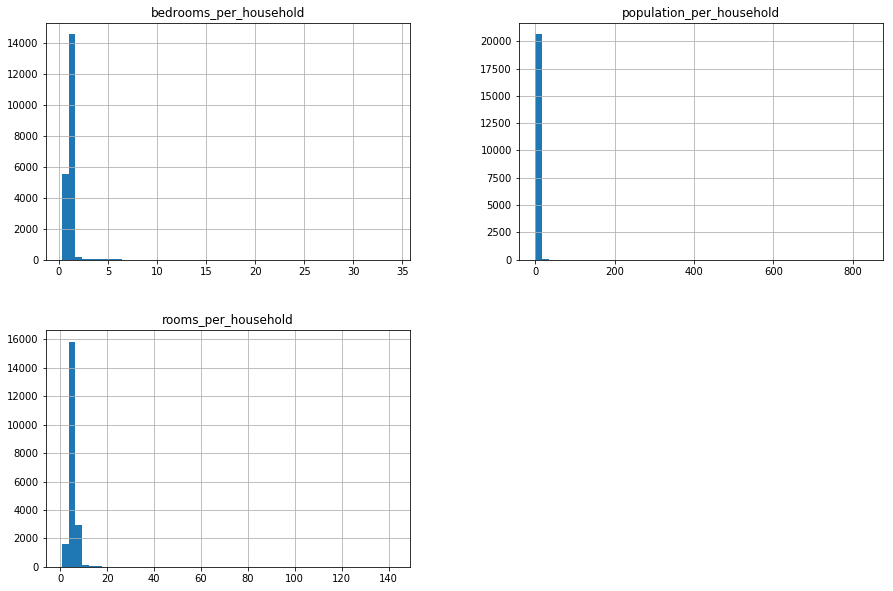

In [17]:
df[new_features].hist(bins=50, figsize=(15, 10));
df[new_features].describe()

In [18]:
df['rooms_per_household'] = df['rooms_per_household'].clip(0, 20)
df['bedrooms_per_household'] = df['bedrooms_per_household'].clip(0, 3)
df['population_per_household'] = df['population_per_household'].clip(0, 10)

,rooms_per_household,bedrooms_per_household,population_per_household
count,20640.000000,20433.000000,20640.000000
mean,5.371367,1.081292,2.925091
std,1.640244,0.207590,0.816070
min,0.846154,0.333333,0.692308
25%,4.444141,1.004098,2.432609
50%,5.209536,1.047619,2.809812
75%,6.026677,1.098535,3.274398
max,20.000000,3.000000,10.000000


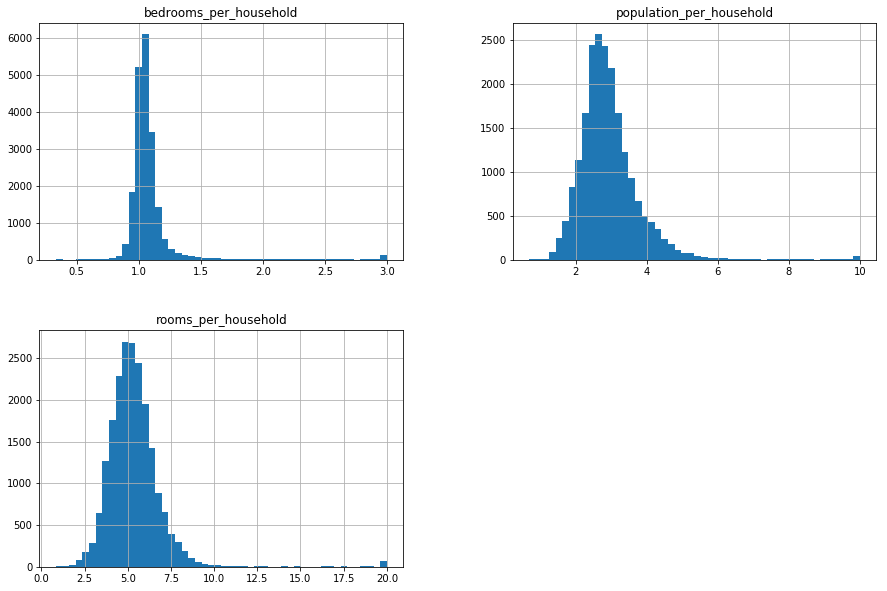

In [19]:
df[new_features].hist(bins=50, figsize=(15, 10));
df[new_features].describe()

In [20]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.224317
total_rooms                 0.152564
housing_median_age          0.105623
households                  0.070702
total_bedrooms              0.054294
population                 -0.029904
longitude                  -0.045967
bedrooms_per_household     -0.089719
latitude                   -0.144160
population_per_household   -0.250024
Name: median_house_value, dtype: float64

In [21]:
df.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_household      207
population_per_household      0
dtype: int64

In [22]:
missing = ['total_bedrooms', 'bedrooms_per_household']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20433 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
rooms_per_household         20640 non-null float64
bedrooms_per_household      20433 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [24]:
numeric = list(df.select_dtypes(include=['float']).columns)
numeric.remove(target)
numeric

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_household',
 'population_per_household']

In [25]:
categoric = ['ocean_proximity']

# Separando treino e teste

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/California_Map.jpg" width=400px>

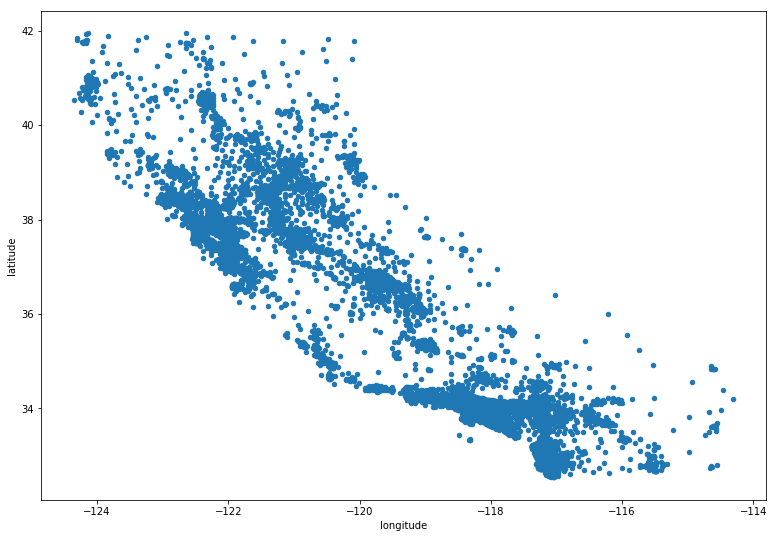

In [26]:
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(13, 9));

In [27]:
def california_map(data):
    data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.25, figsize=(13, 9),
          s=data["population"]/100, label="population", c='median_house_value',
          cmap=plt.get_cmap("jet"), colorbar=True, sharex=False);

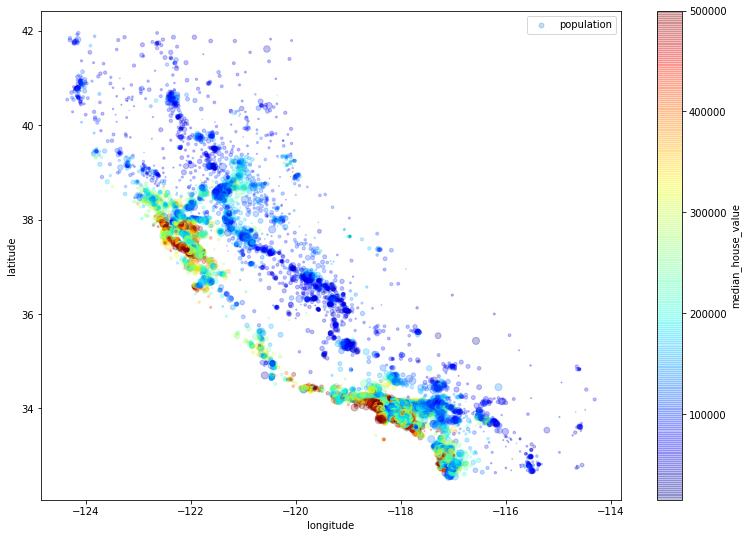

In [28]:
california_map(df)

In [29]:
split = int(len(df) * 70/100)
train = df[:split]
test = df[split:]

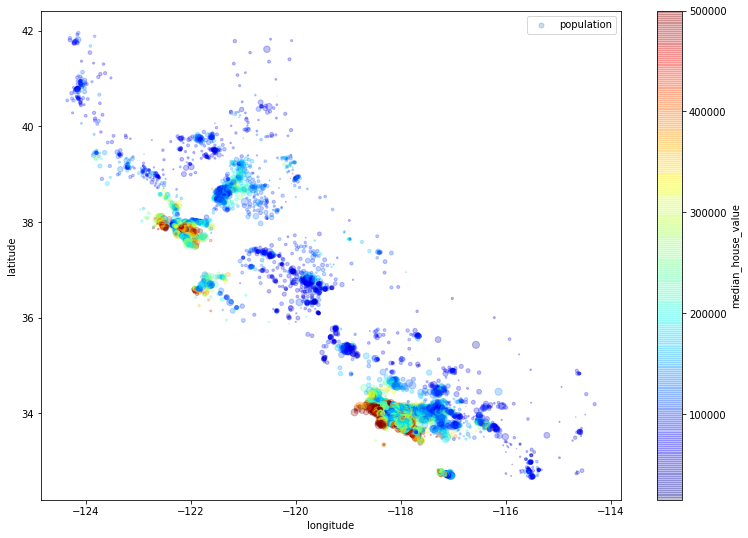

In [30]:
california_map(train)

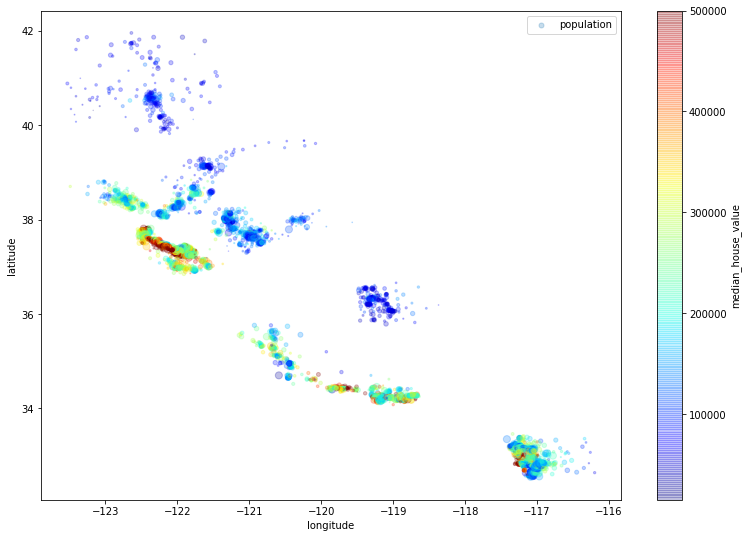

In [31]:
california_map(test)

## Stratify por coluna numérica

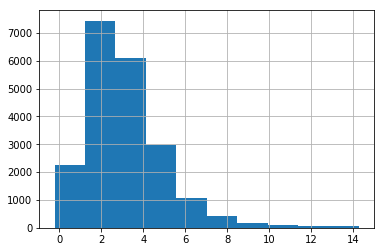

In [32]:
df['median_income'].hist(align='left');

In [33]:
df['income'] = pd.cut(df['median_income'],
                      bins=[0., 1.5, 3., 5., 7., np.inf],
                      labels=[1, 2, 3, 4, 5])

In [34]:
(df['median_income'] <= 1.5).sum()

822

In [35]:
df['income'].value_counts()

3    8748
2    6581
4    3290
5    1199
1     822
Name: income, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, stratify=df['income'],random_state=33)

In [37]:
train = train.drop(labels='income', axis=1)
test = test.drop(labels='income', axis=1)

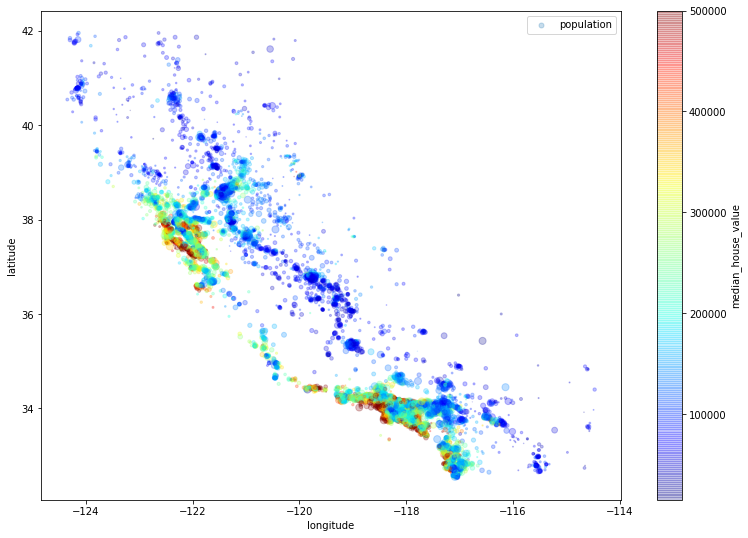

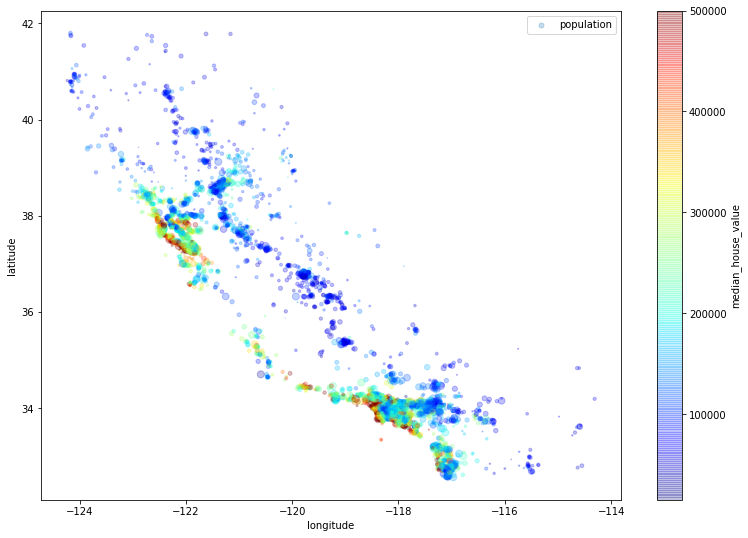

In [38]:
california_map(train), california_map(test);

# Tratando dados categóricos, dados faltantes e padronizando

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
imputer = SimpleImputer(strategy='median')
train[missing] = imputer.fit_transform(train[missing])
test[missing] = imputer.transform(test[missing])

In [41]:
from sklearn.preprocessing import MinMaxScaler

<img src="https://arshpreetsingh.files.wordpress.com/2017/03/normal.png">

In [42]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Métricas

In [43]:
X_train = train.drop(labels=target, axis=1).astype('float')
y_train = train[target]

X_test = test.drop(labels=target, axis=1).astype('float')
y_test = test[target]

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14448, 14), (14448,), (6192, 14), (6192,))

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
y_test.mean(), y_test.std()

(206292.26275839793, 115049.0085069186)

<img src="https://s3.amazonaws.com/acadgildsite/wordpress_images/Data+Science/2Linear+regression+Case+Study+2/LR2+equation/LR2+image+7.PNG">

# Ridge Regression

In [46]:
from sklearn.linear_model import Ridge

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/05213609/snip14.png" width=600>

In [47]:
ridge_reg = Ridge()

ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

print("RMSE treino:", np.sqrt(mean_squared_error(y_train, ridge_reg.predict(X_train))))
print("R2 treino:", r2_score(y_train, ridge_reg.predict(X_train)))

print("RMSE teste:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 teste:", r2_score(y_test, y_pred))

RMSE treino: 67185.04091343464
R2 treino: 0.6618899682790478
RMSE teste: 66519.87460457328
R2 teste: 0.6656454582601166


# Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

<img src="https://explained.ai/gradient-boosting/images/golf-MSE.png" width=600>

In [49]:
param_grid = [
    {'learning_rate': [0.1, 0.2, 0.3], 'n_estimators': [10, 50, 100], 'max_depth': [3, 4, 5]}
]

gb_reg_search = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=10, scoring='r2', refit=True)

gb_reg_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'learning_rate': [0.1, 0.2, 0.3], 'n_estimators': [10, 50, 100], 'max_depth': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [50]:
print("Mean CV R2 score:", gb_reg_search.best_score_)
print("Best parameters:", gb_reg_search.best_params_)

Mean CV R2 score: 0.8262697325441305
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [51]:
y_pred = gb_reg_search.predict(X_test)

print("RMSE teste:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 teste:", r2_score(y_test, y_pred))

RMSE teste: 46309.64449370729
R2 teste: 0.8379506560225041


Produzido por: Matheus Xavier Sampaio